<img src="https://rhyme.com/assets/img/logo-dark.png" align="center"> 

<h2 align="center">Simple Linear Regression (Continous Values) </h2>

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

### Task 2: Loading the Data and Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [2]:
advert = pd.read_csv("Advertising.csv")

In [5]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Task 3: Remove the index column

In [9]:
advert.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Task 4: Exploratory Data Analysis

In [11]:
import seaborn as sns

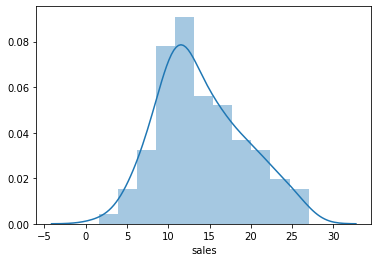

In [12]:
sns.distplot(advert.sales)

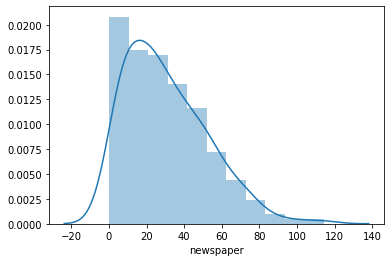

In [16]:
#Skewed to the Right
sns.distplot(advert.newspaper)

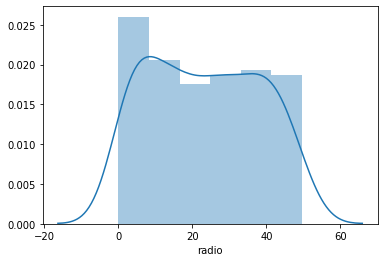

In [14]:
sns.distplot(advert.radio)

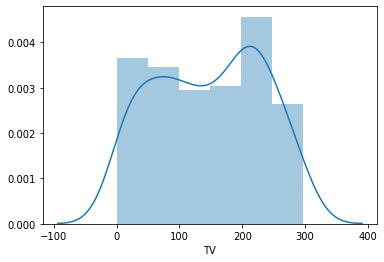

In [15]:
sns.distplot(advert.TV)

In [17]:
#Y_axis Shows that revenue spend on TV is higher than others

### Task 5: Exploring Relationships between Predictors and Response

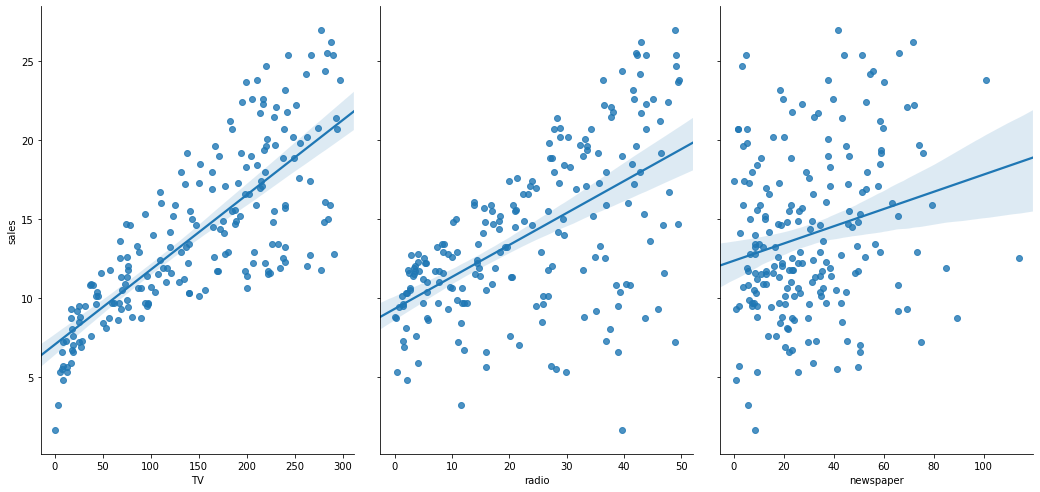

In [18]:
sns.pairplot(advert,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7,kind='reg')

In [20]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [22]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


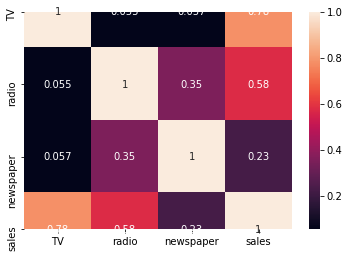

In [29]:
%matplotlib inline
sns.heatmap(advert.corr(),annot=True)

### Task 6: Creating the Simple Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [36]:
X=advert[['TV']]

In [37]:
y=advert[['sales']]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test=train_test_split(X,y,random_state=1)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
linreg = LinearRegression()

In [44]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Task 7: Interpreting Model Coefficients

In [47]:
print(linreg.intercept_)
print(linreg.coef_)

[6.91197262]
[[0.04802945]]


## NOTE
### linreg.intercept_(is the beta 0)
### linreg.coef (Statement of assoiciation for X with the y)

### Task 8: Making Predictions with our Model

In [73]:
# Predicts Sales Using The Tv Continous Data
y_pred = linreg.predict(X_test)
X_test.head()

,TV
58,210.8
40,202.5
34,95.7
102,280.2
184,253.8


In [74]:
# Sales Prediction
y_pred[:5]

array([[17.03658069],
       [16.63793625],
       [11.50839099],
       [20.36982452],
       [19.10184704]])

### Task 9: Model Evaluation Metrics

In [54]:
true=[100,50,30,20]
pred = [90,50,50,30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [58]:
# mean absolute error by hand
print((10+0+20+10)/4)
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [62]:
print((10**2+0**2+20**2+10**2)/4)
print(metrics.mean_squared_error(true,pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [61]:
print(np.sqrt((10**2+0**2+20**2+10**2)/4))
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589


In [65]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.210929707703542
